In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../../common/assets/dataset.csv')
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,...,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,bad


In [67]:
# checking_status — Статус существующего расчетного счета (текущий счет). 
# duration — Срок кредита в месяцах. 
# credit_history — Кредитная история: кредиты, взятые и своевременно погашенные, задержки, критические случаи. 
# purpose — Цель получения кредита. 
# credit_amount — Сумма кредита. 
# savings_status — Статус сберегательного счета или облигаций. 
# employment — Текущий стаж работы в годах. 
# installment_commitment — Размер ежемесячного платежа в прогцентах от располагаемого дохода.
# personal_status — Личные данные: пол и семейное положение. 
# other_parties — Другие заемщики или поручители. 
# residence_since — Срок проживания по текущему адресу в годах. 
# property_magnitude — Величина собственности (например, тип имущества). 
# age — Возраст клиента. 
# other_payment_plans — Другие планы по выплатам (например, по другим кредитам). 
# housing — Жилищные условия (аренда, собственность и т.д.). 
# existing_credits — Количество уже существующих кредитов у клиента. 
# job — Тип работы (профессия). 
# num_dependents — Количество иждивенцев. 
# own_telephone — Наличие собственного телефона (да/нет). 
# foreign_worker — Является ли клиент иностранным работником (да/нет). 
# class — Класс — целевая переменная (например, хороший или плохой заемщик).

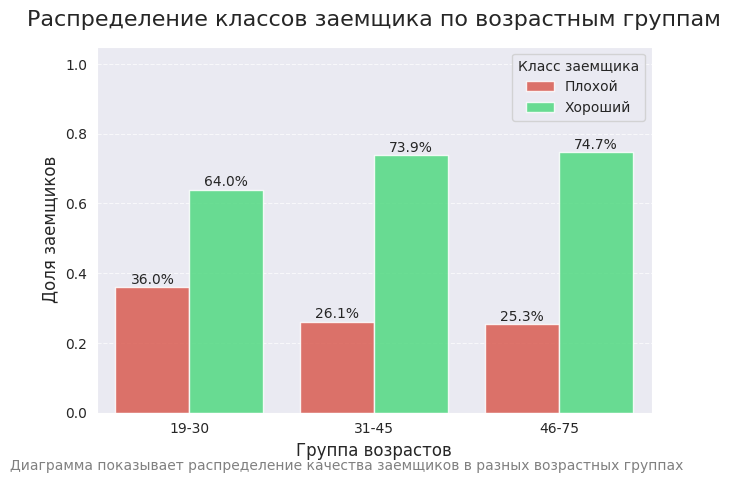

In [7]:
age_bins = [18, 30, 45, 75]
age_labels = ['19-30', '31-45', '46-75']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=True)

df['class_label'] = df['class'].map({1: 'Хороший', 0: 'Плохой', 'good': 'Хороший', 'bad': 'Плохой'})


cross_tab = pd.crosstab(
    index=df['age_group'],
    columns=df['class_label'],
    normalize='index'
).reset_index()

melted_df = cross_tab.melt(
    id_vars='age_group',
    var_name='class_label',
    value_name='proportion'
)

ax = sns.barplot(
    data=melted_df,
    x='age_group',
    y='proportion',
    hue='class_label',
    palette={'Хороший': '#3af07a', 'Плохой': '#f0493a'},
    edgecolor='w',
    alpha=0.85
)

plt.title('Распределение классов заемщика по возрастным группам', fontsize=16, pad=15)
plt.xlabel('Группа возрастов', fontsize=12)
plt.ylabel('Доля заемщиков', fontsize=12)
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for p in ax.patches[:-2]:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width()/2,
        y=height + 0.01,
        s=f'{height:.1%}',
        ha='center',
        fontsize=10
    )

plt.legend(title='Класс заемщика', loc='upper right')
plt.figtext(0.5, 0.01,
            "Диаграмма показывает распределение качества заемщиков в разных возрастных группах",
            ha="center", fontsize=10, color='gray')

plt.tight_layout()
plt.show()

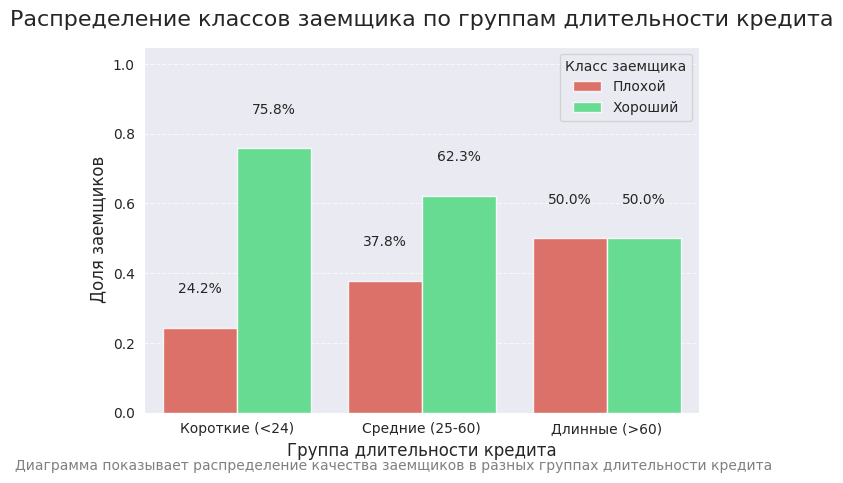

In [8]:
duration_bins = [0, 24, 60, float('inf')]
duration_labels = ['Короткие (<24)', 'Средние (25-60)', 'Длинные (>60)']
df['duration_group'] = pd.cut(df['duration'], bins=duration_bins, labels=duration_labels, right=False)

df['class_label'] = df['class'].map({1: 'Хороший', 0: 'Плохой', 'good': 'Хороший', 'bad': 'Плохой'})


cross_tab = pd.crosstab(
    index=df['duration_group'],
    columns=df['class_label'],
    normalize='index'
).reset_index()

melted_df = cross_tab.melt(
    id_vars='duration_group',
    var_name='class_label',
    value_name='proportion'
)

ax = sns.barplot(
    data=melted_df,
    x='duration_group',
    y='proportion',
    hue='class_label',
    palette={'Хороший': '#3af07a', 'Плохой': '#f0493a'},
    edgecolor='w',
    alpha=0.85
)

plt.title('Распределение классов заемщика по группам длительности кредита', fontsize=16, pad=15)
plt.xlabel('Группа длительности кредита', fontsize=12)
plt.ylabel('Доля заемщиков', fontsize=12)
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for p in ax.patches[:-2]:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width()/2,
        y=height + 0.1,
        s=f'{height:.1%}',
        ha='center',
        fontsize=10
    )

plt.legend(title='Класс заемщика', loc='upper right')
plt.figtext(0.5, 0.01,
            "Диаграмма показывает распределение качества заемщиков в разных группах длительности кредита",
            ha="center", fontsize=10, color='gray')

plt.tight_layout()
plt.show()

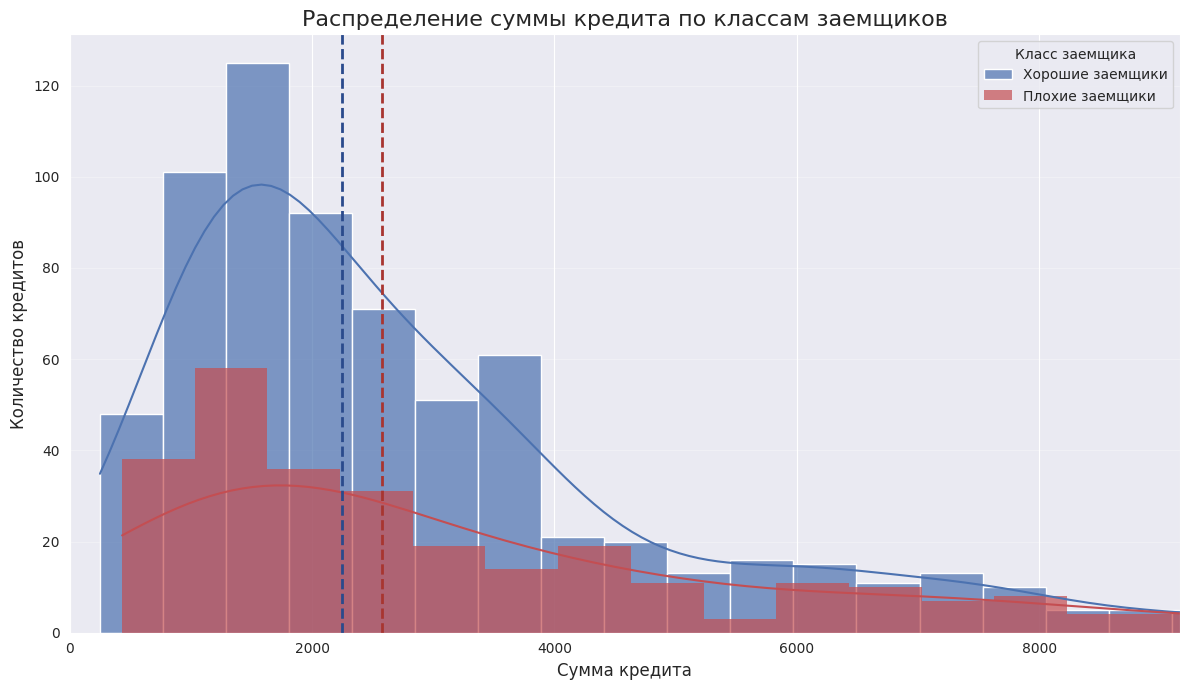

In [49]:
plt.figure(figsize=(12, 7))

good = df[df['class'] == 'good']['credit_amount']
bad = df[df['class'] == 'bad']['credit_amount']

sns.histplot(good, color='#4c72b0', alpha=0.7, label='Хорошие заемщики', kde=True, bins=30)
sns.histplot(bad, color='#c44e52', alpha=0.7, label='Плохие заемщики', kde=True, bins=30, edgecolor='none')

plt.title('Распределение суммы кредита по классам заемщиков', fontsize=16)
plt.xlabel('Сумма кредита', fontsize=12)
plt.ylabel('Количество кредитов', fontsize=12)
plt.legend(title='Класс заемщика')
plt.grid(axis='y', alpha=0.3)
plt.xlim(0, df['credit_amount'].quantile(0.95))  # Ограничение выбросов

plt.axvline(good.median(), color='#2a4a8c', linestyle='dashed', linewidth=2)
plt.axvline(bad.median(), color='#a83530', linestyle='dashed', linewidth=2)

plt.tight_layout()
plt.show()